In [1]:
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = {
    'name': ['강남소방서','서초소방서','송파소방서'],
    'lat': [37.514, 37.495, 37.514],
    'lon': [127.054, 127.009, 127.105]
}

df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

print("GeoDataFrame 생성 완료:")
print(gdf.head())

GeoDataFrame 생성 완료:
    name     lat      lon                geometry
0  강남소방서  37.514  127.054  POINT (127.054 37.514)
1  서초소방서  37.495  127.009  POINT (127.009 37.495)
2  송파소방서  37.514  127.105  POINT (127.105 37.514)


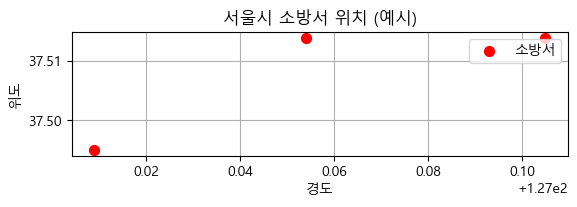

In [4]:
plt.Figure(figsize=(8,8))
gdf.plot(marker='o', color='red', markersize=50, ax=plt.gca(), label='소방서')
plt.title('서울시 소방서 위치 (예시)')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True)
plt.legend()
plt.show()


행정구역 Shapefile 불러오기 완료:
   id       name                  source  \
0  AR  Argentina  https://simplemaps.com   

                                            geometry  
0  MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ...  


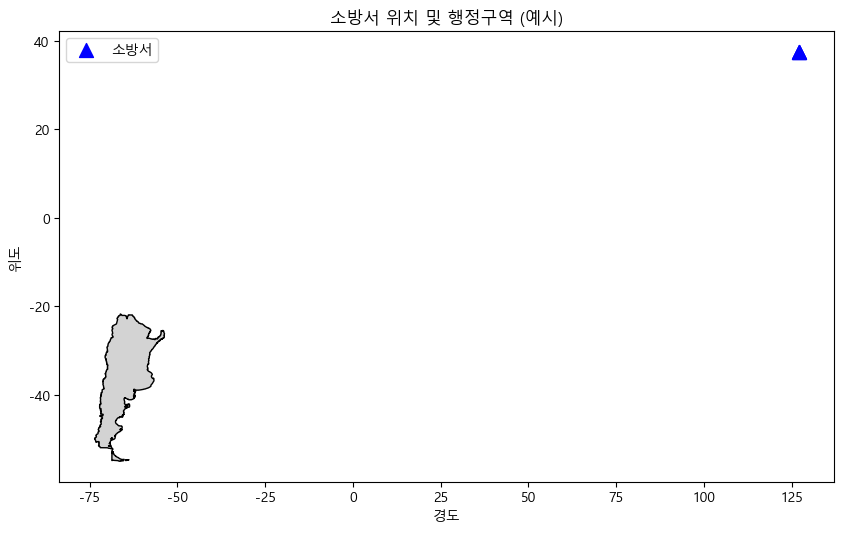

In [5]:
try:
    korea_district = geopandas.read_file("./data/ar.shp", encoding='cp949')
    print("\n행정구역 Shapefile 불러오기 완료:")
    print(korea_district.head())

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    korea_district.plot(ax=ax, color='lightgrey', edgecolor='black')
    gdf.plot(marker='^', color='blue', markersize=100, ax=ax, label='소방서')
    plt.title('소방서 위치 및 행정구역 (예시)')
    plt.xlabel('경도')
    plt.ylabel('위도')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"\nShapefile 불러오기 실패: {e}. 'TM_KOR_ADM_DONG.shp' 파일이 없거나 경로가 잘못되었습니다.")